Ceci est un notebook _ tuto pour Word2Vec

In [18]:
import pandas as pd

In [19]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

Let's use the dataset in the folder. It is already cleaned and tokenized...but we could do it agin. 

In [22]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
data = pd.read_csv('gdrive/My Drive/Formation OC/P6/DataforW2V.csv')

Gensim is an NLP library easy to use. 

Gensom as to be installed
We gonna also use antoher library Python-levenshtein

We gonna make a Word2Vec model using one column of our dataset.

In [24]:
data.columns

Index(['Unnamed: 0', 'description', 'product_name', 'Name_and_Description',
       'labels_num', 'label_name', 'segment k_means PCA'],
      dtype='object')

Gensim library also allows us to do a preprocessing

In [25]:
data.shape

(1050, 7)

In [26]:
data['description'][7]

'star uft tsw  analog watch boy price  whether way work travelling family lifestyle accessory like watch wallet belt help add touch sophistication class mundane regular daily wear come suave leather belt designed finished timepiece separate rest whether way work travelling family lifestyle accessory like watch wallet belt help add touch sophistication class mundane regular daily wear come suave leather belt designed finished timepiece separate rest'

In [27]:
gensim.utils.simple_preprocess('I use to meet 34 persons a Week-day to search for an Iconic beahavior')

['use',
 'to',
 'meet',
 'persons',
 'week',
 'day',
 'to',
 'search',
 'for',
 'an',
 'iconic',
 'beahavior']

We can apply this methode on a string

In [28]:
gensim.utils.simple_preprocess(data.description[45])

['key',
 'feature',
 'akup',
 'love',
 'mom',
 'ceramic',
 'mug',
 'pack',
 'mug',
 'akup',
 'love',
 'mom',
 'ceramic',
 'mug',
 'price',
 'akup',
 'ceramic',
 'coffee',
 'mug',
 'give',
 'best',
 'quality',
 'printed',
 'mug',
 'gift',
 'loved',
 'one',
 'good',
 'quality',
 'packing',
 'coffee',
 'mug',
 'made',
 'ceramic',
 'clay',
 'volume',
 'capacity',
 'ml',
 'make',
 'moment',
 'unforgettable',
 'forever',
 'specification',
 'product',
 'dimension',
 'mug',
 'height',
 'cm',
 'diameter',
 'cm',
 'item',
 'type',
 'coffee',
 'mug',
 'color',
 'multi',
 'color',
 'material',
 'clay',
 'finish',
 'glossy',
 'specialty',
 'style',
 'wash',
 'care',
 'remove',
 'dirt',
 'using',
 'soft',
 'fabric',
 'clean',
 'wipe',
 'moist',
 'cloth',
 'disclaimer',
 'fine',
 'design',
 'pattern',
 'color',
 'tone',
 'product',
 'may',
 'vary',
 'shown',
 'image',
 'would',
 'compromise',
 'quality',
 'brand',
 'akup',
 'design',
 'specification',
 'akup',
 'love',
 'mom',
 'ceramic',
 'mug',
 'g

But it doesn't work with the apply function !!
data["description"].apply(gensim.utils.simple_preprocess)

Let's them import the dataframe in good format.

In [32]:
data2 = pd.read_csv("gdrive/My Drive/Formation OC/P6/dataingoodformat.csv")

In [33]:
data2

Unnamed: 0                                        description  \
0              0  ['key', 'feature', 'elegance', 'polyester', 'm...   
1              1  ['specification', 'sathiyas', 'cotton', 'bath'...   
2              2  ['key', 'feature', 'eurospa', 'cotton', 'terry...   
3              3  ['key', 'feature', 'santosh', 'royal', 'fashio...   
4              4  ['key', 'feature', 'jaipur', 'print', 'cotton'...   
...          ...                                                ...   
1045        1045  ['oren', 'empower', 'extra', 'large', 'self', ...   
1046        1046  ['wallmantra', 'large', 'vinyl', 'sticker', 's...   
1047        1047  ['uberlyfe', 'extra', 'large', 'pigmented', 'p...   
1048        1048  ['wallmantra', 'medium', 'vinyl', 'sticker', '...   
1049        1049  ['uberlyfe', 'large', 'vinyl', 'sticker', 'ube...   

                                           product_name  \
0     ['elegance', 'polyester', 'multicolor', 'abstr...   
1               ['sathiyas', 'cotton', 'bath', 'towel']   
2     ['eurospa', 'cotton', 'terry', 'face', 'towel'...   
3     ['santosh', 'royal', 'fashion', 'cotton', 'pri...   
4     ['jaipur', 'print', 'cotton', 'floral', 'king'...   
...                                                 ...   
1045  ['oren', 'empower', 'extra', 'large', 'self', ...   
1046  ['wallmantra', 'large', 'vinyl', 'sticker', 's...   
1047  ['uberlyfe', 'extra', 'large', 'pigmented', 'p...   
1048  ['wallmantra', 'medium', 'vinyl', 'sticker', '...   
1049          ['uberlyfe', 'large', 'vinyl', 'sticker']   

                                   Name_and_Description  labels_num  \
0     ['key', 'feature', 'elegance', 'polyester', 'm...         4.0   
1     ['specification', 'sathiyas', 'cotton', 'bath'...         0.0   
2     ['key', 'feature', 'eurospa', 'cotton', 'terry...         0.0   
3     ['key', 'feature', 'santosh', 'royal', 'fashio...         4.0   
4     ['key', 'feature', 'jaipur', 'print', 'cotton'...         4.0   
...                                                 ...         ...   
1045  ['oren', 'empower', 'extra', 'large', 'self', ...         0.0   
1046  ['wallmantra', 'large', 'vinyl', 'sticker', 's...         0.0   
1047  ['uberlyfe', 'extra', 'large', 'pigmented', 'p...         0.0   
1048  ['wallmantra', 'medium', 'vinyl', 'sticker', '...         0.0   
1049  ['uberlyfe', 'large', 'vinyl', 'sticker', 'ube...         0.0   

           label_name  
0     Home Furnishing  
1           Baby Care  
2           Baby Care  
3     Home Furnishing  
4     Home Furnishing  
...               ...  
1045        Baby Care  
1046        Baby Care  
1047        Baby Care  
1048        Baby Care  
1049        Baby Care  

[1050 rows x 6 columns]

In [34]:
data2.description[0]

"['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'draw', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'bring', 'home', 'elegant', 'curtain', 'filter', 'light', 'room', 'get', 'right', 'amount'

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1050 non-null   int64  
 1   description           1050 non-null   object 
 2   product_name          1050 non-null   object 
 3   Name_and_Description  1050 non-null   object 
 4   labels_num            1050 non-null   float64
 5   label_name            1050 non-null   object 
 6   segment k_means PCA   1050 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 57.5+ KB


In [36]:
data.labels_num

0       4.0
1       0.0
2       0.0
3       4.0
4       4.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: labels_num, Length: 1050, dtype: float64

In [37]:
dataD= data.description.values.tolist()

In [38]:
dataD[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain  height pack price  curtain enhances look interior curtain made  high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide draw first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain  height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model duster color multicolor dimension length  box number content sale package pack sale package

In [39]:
type(data.description)

pandas.core.series.Series

It is not perfect but  use some heuristic rules

In [40]:
def Convert(string):
    li = list(string.split(" "))
    return li

In [41]:
L =['Amour', 'jour34', 'Avacement_trimestrie3L', "Supplication", '6umou' ]
df = pd.Series(L)
type(df)

pandas.core.series.Series

In [42]:
df = pd.Series(data2['description'])
df[0]

"['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'draw', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'bring', 'home', 'elegant', 'curtain', 'filter', 'light', 'room', 'get', 'right', 'amount'

In [43]:
data2.Name_and_Description

0       ['key', 'feature', 'elegance', 'polyester', 'm...
1       ['specification', 'sathiyas', 'cotton', 'bath'...
2       ['key', 'feature', 'eurospa', 'cotton', 'terry...
3       ['key', 'feature', 'santosh', 'royal', 'fashio...
4       ['key', 'feature', 'jaipur', 'print', 'cotton'...
                              ...                        
1045    ['oren', 'empower', 'extra', 'large', 'self', ...
1046    ['wallmantra', 'large', 'vinyl', 'sticker', 's...
1047    ['uberlyfe', 'extra', 'large', 'pigmented', 'p...
1048    ['wallmantra', 'medium', 'vinyl', 'sticker', '...
1049    ['uberlyfe', 'large', 'vinyl', 'sticker', 'ube...
Name: Name_and_Description, Length: 1050, dtype: object

In [44]:
# We use the preprocess method included in gensim
df = data2.Name_and_Description.apply(gensim.utils.simple_preprocess)

In [45]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Name_and_Description'
cv_fit = cvect.fit(data2[feat])
ctf_fit = ctf.fit(data2[feat])

cv_transform = cvect.transform(data2[feat])  
ctf_transform = ctf.transform(data2[feat])  

In [46]:
cv_transform

<1050x4293 sparse matrix of type '<class 'numpy.int64'>'
	with 24762 stored elements in Compressed Sparse Row format>

In [47]:
ctf_transform

<1050x4293 sparse matrix of type '<class 'numpy.float64'>'
	with 24762 stored elements in Compressed Sparse Row format>

In [48]:
from gensim.models import Word2Vec

We create a Word2Vec Model with the clened data

In [58]:
My_vector_size = 300

In [59]:
dflist = df.to_list()

## Méthode 1 : Déclaration d'un modèle.

In [62]:
My_model = Word2Vec (sentences= dflist, min_count=1 , window = 5)

# sentences expects a list of lists with the tokenized documents.
# vector_size defines the size of the word vectors. In this case, you set it to 100.
# workers defines how many cores you use for training. I set it to 1 to make sure the code is deterministically reproducible.
# seed sets the seed for random number generation. It's set to the constant SEED you defined in the first cell.


In [63]:
type(My_model)

gensim.models.word2vec.Word2Vec

we can check the 'methods' available with this model

In [68]:
dir(My_model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_input_data_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_job_params',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_minimize_model',
 '_raw_word_count',
 '_save_specials',
 '_set_train_params',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_update_job_params',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'accuracy',
 'alpha',
 'batch_words',
 'build_vocab',
 'build_vocab_from_freq',
 'ca

In [66]:
words = My_model.wv
len(words)


TypeError: ignored

Words is a keyed vector

In [ ]:
type(words)

gensim.models.keyedvectors.KeyedVectors

We can get a dictionnaty of it

In [69]:
My_words_dictionnary = words.key_to_index
len(My_words_dictionnary)

AttributeError: ignored

In [ ]:
vocab_size = len(My_words_dictionnary)
vocab_size

4367

In [ ]:
for word, inndex in My_words_dictionnary.items():
    embedding_vector = words[word]
    


In [ ]:
words.most_similar('curtain')

[('eyelet', 0.999491274356842),
 ('door', 0.9994387030601501),
 ('comfort', 0.9990542531013489),
 ('velvet', 0.9990147352218628),
 ('self', 0.9989975690841675),
 ('brown', 0.9989297986030579),
 ('polyester', 0.9989244937896729),
 ('sofa', 0.9988822937011719),
 ('aroma', 0.9988632202148438),
 ('glass', 0.9986655116081238)]

In [ ]:
import numpy as np
embedding_matrix = np.zeros((vocab_size, My_vector_size ))
embedding_matrix.shape

(4367, 300)

But My_model is also taking into account the number of documents (ie the number of items in our list of list). see the corpus_count here below... That will help us to build the Context Matrix.

In [ ]:
My_model.corpus_count

1050

In [56]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model:  Word Embedding MODEL (here with Gensim)

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
 


In [ ]:
My_model.build_vocab(dflist)

ICI On entraîne notre propre modèle avec les données du dataset

In [ ]:
My_model.train(dflist, total_examples=My_model.corpus_count, epochs=100)
model_vectors = My_model.wv
My_model_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(My_model_words))
print("Word2Vec trained")

Vocabulary size: 4367
Word2Vec trained


In [ ]:
vectorized_docs = vectorize(dflist, model=My_model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 300)

In [ ]:
Embed = np.asarray(vectorized_docs)
Embed.shape

(1050, 300)

In [ ]:
ARI, X_tsne, labels = ARI_fct(Embed)

NameError: name 'ARI_fct' is not defined

In [ ]:
TSNE_visu_fct(X_tsne, ARI)

TypeError: TSNE_visu_fct() missing 1 required positional argument: 'ARI'

Modèle 2 : Paramètres pour la création d'une modèle et préparation d'une liste de tokens via gensim.

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data2[feat].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

Méthode 2 : Création d'un modèle Word2VEC

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4367
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4368


In [ ]:

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=7
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne
    cls = KMeans(n_clusters=num_labels, init="random", random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(data2.labels_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


Création de la matrice Embedding (nb de mot X vector_dimension)

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4368, 300)


Création d'un modèle par réseau de neurones

In [ ]:
# Création du modèle

input=tf.keras.Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=tf.keras.Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1310400   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,310,400
Trainable params: 1,310,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [ ]:
import time

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

NameError: name 'TSNE' is not defined

In [ ]:
TSNE_visu_fct(X_tsne, labels, ARI)

NameError: name 'TSNE_visu_fct' is not defined

Méthode 1. 

In [ ]:
embeddings.shape

(1050, 300)

In [ ]:
import time
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans


In [ ]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.422 time :  18.0

Tf-idf : 
--------


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5105 time :  26.0


In [ ]:
ARI, X_tsne, cls_labels = ARI_fct(Embed)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5993 time :  15.0


In [ ]:
cls_labels.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
true_labels = data2.labels_num
type(true_labels)

pandas.core.series.Series

In [ ]:
cls_labels = pd.Series(cls_labels)

In [ ]:
data2.columns

Index(['Unnamed: 0', 'description', 'product_name', 'Name_and_Description',
       'labels_num', 'label_name'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, cls_labels, ARI) :

    idx = data.index
    true_labels = data2.loc[idx, "labels_num"]

    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=true_labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(true_labels), loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=cls_labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(cls_labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)

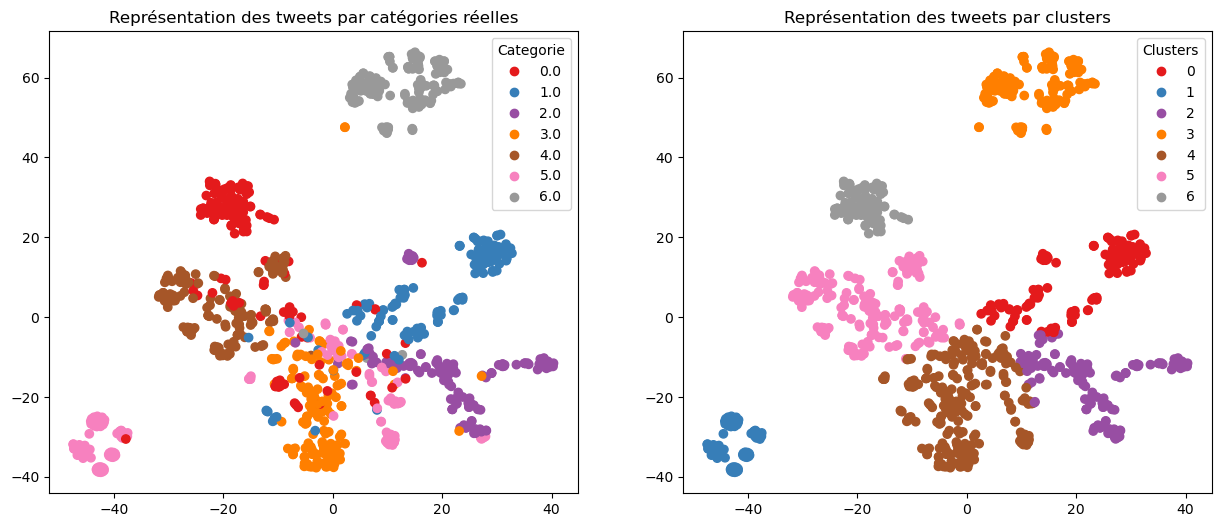

ARI :  0.5993


In [ ]:
TSNE_visu_fct(X_tsne,cls_labels, ARI)

In [ ]:
My_model.corpus_count

1050

In [ ]:
My_model.epochs

100

In [ ]:
My_model_vectors = My_model.wv

In [ ]:
len(My_model_vectors)

4367

In [ ]:
len(My_model_vectors.index_to_key)

4367

Creating a Embedding matrix from our data

In [ ]:
for w, idx in My_words_dictionnary.items():
    embedding_matrix[idx] = words[w]
    

In [ ]:
embedding_matrix.shape

(4368, 300)

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
# w2v_size = 300
# word_index = tokenizer.word_index
# vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((len(My_model_vectors), My_vector_size))
#  We create a matrix of a size number of tokens X number of features
i=0
j=0
    
for word, idx in My_words_dictionnary.items():
    i +=1
    if word in My_model_vectors.index_to_key:
        j +=1
        embedding_vector = My_model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = My_model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4367, 300)


In [ ]:
tokenizer = Tokenizer()
# It is the Tokenizer module import above....

FA) Should we do dflist or df ? 

In [ ]:
maxlen =100

In [ ]:
tokenizer.fit_on_texts(dflist)

In [ ]:
X_data = pad_sequences(tokenizer.texts_to_sequences(dflist), maxlen= 100, padding = 'post')

In [ ]:
X_data.shape

(1050, 100)

In [ ]:
X_data

array([[  68,   47,  648, ...,  161,  169,  126],
       [   9, 1566,   10, ...,    0,    0,    0],
       [ 123,   61, 1922, ...,  198,   61,    4],
       ...,
       [1373,  638,  321, ...,    0,    0,    0],
       [ 415,  280,  226, ...,    0,    0,    0],
       [1373,  321,  226, ...,    0,    0,    0]])

In [ ]:
# ARI, X_tsne, cls_labels = ARI_fct(X_data)

## Création du modèle d'embedding

In [ ]:
# input=tf.keras.Input(shape=(len(X_data),maxlen),dtype='float64')
# # Input() is used to instantiate a Keras tensor.

# # A Keras tensor is a symbolic tensor-like object, which we augment with certain attributes
# #  that allow us to build a Keras model just by knowing the inputs and outputs of the model.
# word_input=tf.keras.Input(shape=(maxlen,),dtype='float64')  
# word_embedding=Embedding(input_dim=len(My_model_vectors),
#                          output_dim = My_vector_size,
#                          weights = [embedding_matrix],
#                          input_length=maxlen)(word_input)
# word_vec=tf.keras.GlobalAveragePooling1D()(word_embedding)  
# embed_model = My_model([word_input],word_vec)

# embed_model.summary()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score



In [ ]:
vectorized_docs

[array([-1.96687788e-01, -1.06126420e-01, -4.94946353e-02,  2.77507268e-02,
        -2.24730358e-01,  3.30550343e-01,  3.42224956e-01, -3.89248371e-01,
         2.77281851e-01, -4.43960056e-02,  1.28464863e-01, -4.92443480e-02,
        -6.02784865e-02, -1.22641101e-01,  1.85705915e-01, -2.41261721e-01,
        -2.17981189e-01, -2.52216816e-01,  3.24742347e-01, -3.60641629e-01,
         1.72058687e-01,  2.77894795e-01, -5.00200272e-01,  1.08446844e-01,
         4.50006217e-01, -5.74805476e-02, -2.76510715e-01,  2.55110323e-01,
        -3.56543183e-01,  4.45568096e-03,  7.99062073e-01, -3.12193841e-01,
        -1.47575304e-01, -2.18377739e-01,  2.36759596e-02, -1.38482049e-01,
         6.80911317e-02,  8.96995515e-02,  2.32584640e-01, -2.93002993e-01,
        -4.72243488e-01,  3.54561210e-01,  2.09515855e-01, -8.05523992e-02,
        -4.68717925e-02, -2.82569062e-02,  3.30052763e-01, -1.94699913e-01,
        -1.02963425e-01,  1.00772671e-01,  2.20576674e-01, -1.43224984e-01,
        -4.0

In [ ]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=7,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": dflist,
    "tokens": [" ".join(text) for text in df],
    "cluster ": cluster_labels,
    "cluster2" : cls_labels
})

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 7
Silhouette coefficient: 0.19
Inertia:28206.281910540492
Silhouette values:
    Cluster 6: Size:144 | Avg:0.53 | Min:0.07 | Max: 0.64
    Cluster 3: Size:10 | Avg:0.51 | Min:0.31 | Max: 0.58
    Cluster 0: Size:86 | Avg:0.47 | Min:0.05 | Max: 0.57
    Cluster 2: Size:91 | Avg:0.31 | Min:-0.05 | Max: 0.49
    Cluster 4: Size:221 | Avg:0.12 | Min:-0.05 | Max: 0.21
    Cluster 1: Size:242 | Avg:0.09 | Min:-0.12 | Max: 0.23
    Cluster 5: Size:256 | Avg:0.00 | Min:-0.20 | Max: 0.13


In [ ]:
df_clusters

text  \
0     [key, feature, elegance, polyester, multicolor...   
1     [specification, sathiyas, cotton, bath, towel,...   
2     [key, feature, eurospa, cotton, terry, face, t...   
3     [key, feature, santosh, royal, fashion, cotton...   
4     [key, feature, jaipur, print, cotton, floral, ...   
...                                                 ...   
1045  [oren, empower, extra, large, self, adhesive, ...   
1046  [wallmantra, large, vinyl, sticker, sticker, p...   
1047  [uberlyfe, extra, large, pigmented, polyvinyl,...   
1048  [wallmantra, medium, vinyl, sticker, sticker, ...   
1049  [uberlyfe, large, vinyl, sticker, uberlyfe, la...   

                                                 tokens  cluster   cluster2  
0     key feature elegance polyester multicolor abst...         5         0  
1     specification sathiyas cotton bath towel bath ...         5         5  
2     key feature eurospa cotton terry face towel se...         5         5  
3     key feature santosh royal fashion cotton print...         5         0  
4     key feature jaipur print cotton floral king si...         5         0  
...                                                 ...       ...       ...  
1045  oren empower extra large self adhesive sticker...         1         0  
1046  wallmantra large vinyl sticker sticker pack pr...         4         1  
1047  uberlyfe extra large pigmented polyvinyl film ...         1         0  
1048  wallmantra medium vinyl sticker sticker wallma...         4         0  
1049  uberlyfe large vinyl sticker uberlyfe large vi...         4         0  

[1050 rows x 4 columns]

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

## BERT

In [ ]:
# Bert
import os
import transformers
from transformers import BertConfig, BertTokenizer, AutoTokenizer
os.environ["TF_KERAS"]='1'

In [ ]:
from transformers import AutoModel, TFBertModel

In [ ]:
import keras
keras.__version__

'2.10.0'

In [ ]:
import time

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
from transformers import AutoModel, TFBertModel

In [ ]:
auto_model = AutoModel.from_pretrained("bert-base-uncased")
tfbert_model = TFBertModel.from_pretrained("bert-base-uncased")

RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
[WinError 182] Le système d’exploitation ne peut pas exécuter %1. Error loading "c:\Users\DELL\anaconda3\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['sentence_dl'].to_list()

NameError: name 'TFAutoModel' is not defined

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
False


In [ ]:
import bert
import tensorflow_hub as hub
import tensorflow_text as text

ModuleNotFoundError: No module named 'tensorflow_text'

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer

NameError: name 'bert' is not defined

In [ ]:
data2.head(5)

Unnamed: 0                                        description  \
0           0  ['key', 'feature', 'elegance', 'polyester', 'm...   
1           1  ['specification', 'sathiyas', 'cotton', 'bath'...   
2           2  ['key', 'feature', 'eurospa', 'cotton', 'terry...   
3           3  ['key', 'feature', 'santosh', 'royal', 'fashio...   
4           4  ['key', 'feature', 'jaipur', 'print', 'cotton'...   

                                        product_name  \
0  ['elegance', 'polyester', 'multicolor', 'abstr...   
1            ['sathiyas', 'cotton', 'bath', 'towel']   
2  ['eurospa', 'cotton', 'terry', 'face', 'towel'...   
3  ['santosh', 'royal', 'fashion', 'cotton', 'pri...   
4  ['jaipur', 'print', 'cotton', 'floral', 'king'...   

                                Name_and_Description  labels_num  \
0  ['key', 'feature', 'elegance', 'polyester', 'm...         4.0   
1  ['specification', 'sathiyas', 'cotton', 'bath'...         0.0   
2  ['key', 'feature', 'eurospa', 'cotton', 'terry...         0.0   
3  ['key', 'feature', 'santosh', 'royal', 'fashio...         4.0   
4  ['key', 'feature', 'jaipur', 'print', 'cotton'...         4.0   

        label_name  
0  Home Furnishing  
1        Baby Care  
2        Baby Care  
3  Home Furnishing  
4  Home Furnishing

In [ ]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=False)

OSError: SavedModel file does not exist at: C:\Users\DELL\AppData\Local\Temp\tfhub_modules\d760773f85f64fc84ae0b47310f7cfe3bcec4868\{saved_model.pbtxt|saved_model.pb}